In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime
from scipy import signal

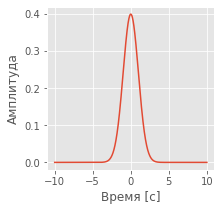

In [8]:
a1 = np.sqrt(1 / 2 / np.pi)
a2 = 1
Fs = 1000
Ts = 1.0 / Fs
t0 = 0

df = pd.DataFrame()
df["t"] = np.arange(-10, 10, Ts)
## функция Гаусса
df["y"] = a1 * np.exp(-((df.t - t0) ** 2) / 2 / a2)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(df.t, df.y)
ax.grid(which="both")
ax.set_xlabel("Время [c]")
ax.set_ylabel("Амплитуда")
ax.grid()

In [9]:
N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны)
frq = frq[range(int(N / 2))]

## делаем преобразование Фурье
Y = 2 / N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны)
Y = Y[range(int(N / 2))]


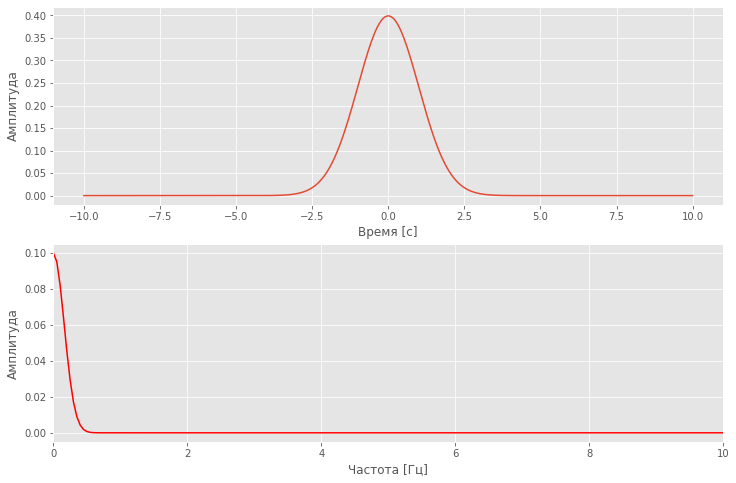

In [14]:
## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
# ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel("Время [c]")
ax[0].set_ylabel("Амплитуда")
# ax[0].grid()

ax[1].plot(frq, abs(Y), "r")
ax[1].set_xlabel("Частота [Гц]")
ax[1].set_ylabel("Амплитуда")
ax[1].set_xlim([0, 10])
# ax[1].grid()
plt.show()

In [15]:
Y[0]

(0.10000000000005543+0j)

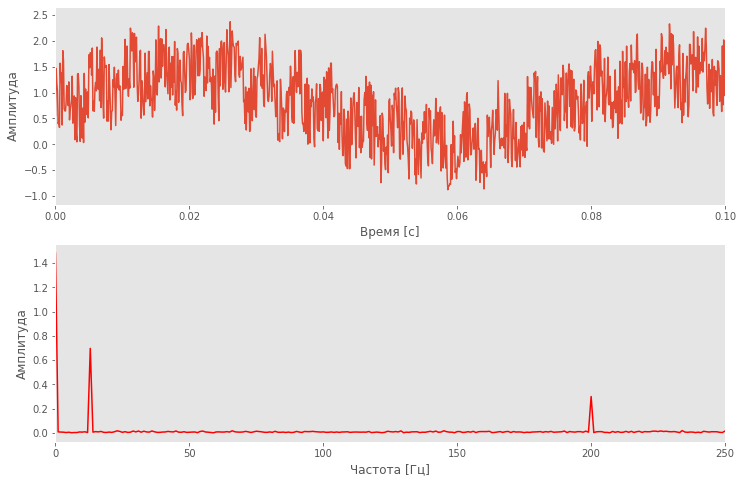

In [16]:
w1 = 13  ## частота первого синуса
w2 = 200  ## частота второго синуса
a1 = 0.7  ## амплитуда первого синуса
a2 = 0.3  ## амплитуда второго синуса
a3 = 1.5  ## амплитуда шума
Fs = 10000  ## частота дискретизации: 10 кГц
Ts = 1.0 / Fs  ## интервал времени между соседними точками

np.random.seed(42)

df = pd.DataFrame()
## ось времени
df["t"] = np.arange(0, 1, Ts)
## cигнал
df["y"] = (
    a1 * np.sin(2 * np.pi * w1 * df.t)
    + a2 * np.sin(2 * np.pi * w2 * df.t)
    + a3 * np.random.random(len(df))
)

N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны)
frq = frq[range(int(N / 2))]

## делаем преобразование Фурье
Y = 2 / N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны)
Y = Y[range(int(N / 2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel("Время [c]")
ax[0].set_ylabel("Амплитуда")
ax[0].grid()

ax[1].plot(frq, abs(Y), "r")
ax[1].set_xlabel("Частота [Гц]")
ax[1].set_ylabel("Амплитуда")
ax[1].set_xlim([0, 250])
ax[1].grid()

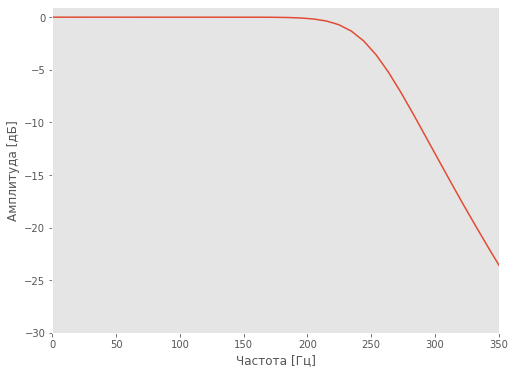

In [66]:
b, a = signal.butter(8, 250, fs=Fs)
# частотная характеристика фильтра
w, h = signal.freqz(b, a)
# радианы -> Герцы
w = Fs / np.pi / 2 * w

f, ax = plt.subplots(figsize=(8, 6))
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel("Амплитуда [дБ]")
ax.set_xlim([0, 350])
ax.set_ylim([-30, 1])
ax.set_xlabel("Частота [Гц]")
ax.grid(which="both")
plt.show()


# ind = np.where((w > w2 - 5) & (w < w2 + 5))[0][0]
# print(
#     f"Подавление сигнала на частоте {w2} Гц: {20 * np.log10(abs(h[ind])):.1f} дБ  (в {1/abs(h[ind]):0.1f} раз)"
# )


In [49]:
indx = np.where((w >= 253) & (w <= 255))[0][0]
print(f"{20*np.log10(abs(h[indx])):.1f}")


-3.6


Примените полученный фильтр при помощи функции signal.filtfilt. Укажите среднее значение модуля отфильтрованной функции, округлённое до трёх знаков после запятой.



In [58]:
df["y_filt_double"] = signal.filtfilt(b, a, df.y, padlen=150)
np.mean(abs(df["y_filt_double"])).round(3)

0.767

Создайте высокочастотный фильтр Чебышёва второго рода (signal.cheby2) четвёртого порядка с подавлением в 40 дБ на частоте 30 Гц. Укажите значение подавления сигнала на частоте 29 Гц (число округлено до целых) в дБ, округлённое до одной десятой.



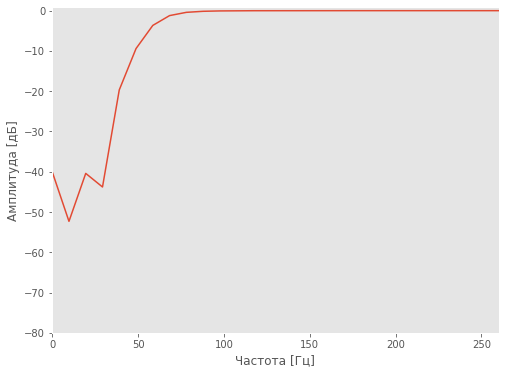

In [74]:
b, a = signal.cheby2(4, 40, 30, fs=Fs, btype="highpass")

# частотная характеристика фильтра
w, h = signal.freqz(b, a)
# радианы -> Герцы
w = Fs / np.pi / 2 * w

f, ax = plt.subplots(figsize=(8, 6))
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel("Амплитуда [дБ]")
ax.set_xlim([0, 260])
ax.set_ylim([-80, 1])
ax.set_xlabel("Частота [Гц]")
ax.grid(which="both")
plt.show()

In [75]:
indx = np.where((w >= 28) & (w <= 30))[0][0]
print(f"{20*np.log10(abs(h[indx])):.1f}")


-43.8


In [76]:
df["y_filt_cheby2"] = signal.filtfilt(b, a, df.y, padlen=150)
np.mean(abs(df["y_filt_cheby2"])).round(3)

0.4